In [1]:
import numpy as np
# keeps plots inside shell
%matplotlib inline
import matplotlib.pyplot as plt



In [2]:
#Inputting the data file
height_data=np.loadtxt("pmt_data.txt")
num_data_pts = 1000000
print len(height_data)

1000000


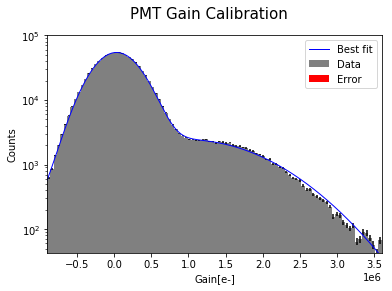

In [6]:
#Graphing the histogram
num_bins = 100
a_range = (-9e5, 3.6e6)
y_values, bin_edges, _ = plt.hist(height_data, bins=num_bins, range=a_range, color= "gray", label="Data")
_ = plt.xlim(a_range)
_ = plt.xlabel('Gain[e-]')
_ = plt.ylabel('Counts')
_ = plt.yscale('log')
_ = plt.ylim([0,10**5])

#Inputting the error bar
_ = bincenters = 0.5*(bin_edges[1:]+bin_edges[:-1])
_ = menStd=np.sqrt(y_values)
_ = width = 0.05
_ = plt.bar(bincenters, y_values, width=width, color='r', yerr=menStd, label ="Error",linewidth=1000.0)
_ = plt.suptitle('PMT Gain Calibration', fontsize=15)
#Fitting the data

#Defining the fitting graph
def func(x, a0, b0, c0, a1, b1, c1, a2, b2, c2):
   return a0*np.exp(-(x - b0) ** 2/(2 * c0 ** 2)) + a1 * np.exp(-(x - b1) ** 2/(2 * c1 ** 2) + a2 * np.exp(-(x - b2) ** 2/(2 * c2 ** 2)))

#Plotting the fitting graph with the best fit
x = np.linspace(-9e5, 3.6e6, 10000)
plt.plot(x,func(x,53000,30000,290000,2400,1000000,900000, 0.0001 , 600000, 900000),linewidth=1.0, color="blue", label="Best fit")
plt.legend()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

#Saving the graph
plt.savefig('assignment-2')